In [6]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import scipy
import math
import irreducible_library as irr
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
mlist = np.logspace(-3,0,num=25)
abundance = [1,0.1,10e-12,10e-13]
Q_production_nomu=[  9.36431037e-13,   8.75851343e-13,   8.20430909e-13,
         7.68946804e-13,   7.20247231e-13,   6.81605003e-13,
         6.41616007e-13,   6.11040555e-13,   5.74944927e-13,
         5.48654911e-13,   5.19668008e-13,   4.95793383e-13,
         4.73794625e-13,   4.57432551e-13,   4.34744453e-13,
         4.16537510e-13,   4.01249889e-13,   3.86509476e-13,
         3.72133087e-13,   3.59145588e-13,   3.49409810e-13,
         3.38245198e-13,   3.29930543e-13,   3.22923893e-13,
         3.16328930e-13];

In [12]:
def relic_ann(Q, mx, whole_shebang=False, muon=True, noQ = False):
    """ 
    Given a value of Q and mx returns the number density over relic abundance due to e+e- annihilations.
    """
    Tlist = np.logspace(2.5, -5,num=500)
    gamma_list = [irr.gamma_ann(Q, mx, i,muon=muon, noQ = noQ) for i in Tlist]
    gamma=scipy.interpolate.interp1d(Tlist, gamma_list, fill_value = 'extrapolate')
    alist = np.logspace(-1.9, 4.5,num=500)
    
    if noQ:
        # Numerically solving for abundance directly
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-30))], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05/10**(-22))], alist)
        #print("This function is returning (nDM(modified no Q) final, a_max)")
        return np.array([np.exp(gulu[-1][-1]),alist[-1]])
    else:
        # In general this is the section I use
        if mx < 0.001:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05)], alist)
        else:
            gulu = scipy.integrate.odeint(lambda logn, a: \
                - 3/a +2/(np.exp(logn)*a*irr.H(a))*gamma(irr.T(a)), [np.log(6e-05)], alist)
        if whole_shebang:
            print(np.exp(gulu[-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3)
            return np.exp(gulu).flatten()
        else:
            return np.exp(gulu[-1][-1])/irr.nxrelic(mx, irr.T(100))*alist[-1]**3/100**3

In [24]:
#Q = np.zeros(3)
Q1 = np.zeros(25)
Q2 = np.zeros(25)
Q3 = np.zeros(25)
Q4 = np.zeros(25)

for i in range(25):
    info1 = relic_ann(Q_production_nomu[i],mlist[i])
    Q1[i] = np.sqrt(abundance[0]/info1)*Q_production_nomu[i]
    info2 = relic_ann(Q_production_nomu[i],mlist[i])
    Q2[i] = np.sqrt(abundance[1]/info2)*Q_production_nomu[i]
    info3 = relic_ann(Q_production_nomu[i],mlist[i])
    Q3[i] = np.sqrt(abundance[2]/info3)*Q_production_nomu[i]
    info4 = relic_ann(Q_production_nomu[i],mlist[i])
    Q4[i] = np.sqrt(abundance[3]/info4)*Q_production_nomu[i]


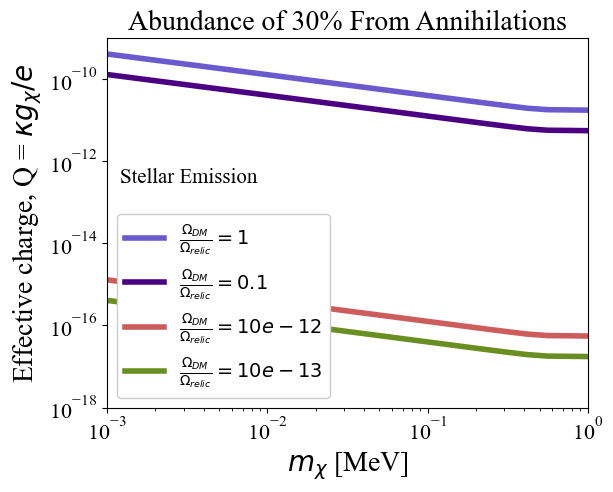

In [26]:
f, ax = plt.subplots()
f.set_size_inches(6.2, 4.8)

ax.loglog(mlist, Q1,c='slateblue',lw=4,label = r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 1$')
ax.loglog(mlist, Q2,c='indigo',lw=4,label = r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 0.1$')
ax.loglog(mlist, Q3,c='indianred',lw=4,label = r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-12$')
ax.loglog(mlist, Q4,c='olivedrab',lw=4,label = r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-13$')
#ax.loglog(m_production, Q_production,c='slateblue',lw=4)#, ls=":")
#ax.loglog(m_production, Q_ann_production,c='slateblue',lw=4)
ax.set_xlim([1e-3, 1])
ax.set_ylim([1e-18, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)

#plotfiles(ax, 'stars', projection=False, DD=False,color='LightSteelBlue',a=0.3)
#plotfiles(ax, 'stars_conservative', projection=False, DD=False,color='LightSteelBlue',a=0.3)
ax.text(1.2e-3, 3e-13, r'Stellar Emission', rotation=0, color='k', fontsize=15)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Abundance of 30% From Annihilations', fontsize=20)
lya_index=24
planck_index=27
s4_index = 32
gs_index=38

ax.legend(framealpha=1, loc='lower left', fontsize=14)


#ax.set_xlim([1e-3, 1])
#ax.set_ylim([1e-15, 1e-9])

